In [31]:
import pandas_datareader.data as web
import datetime

In [32]:
start = datetime.datetime(2019, 5, 15)
end = datetime.datetime(2019, 6, 15)
gs = web.DataReader("078930.KS","yahoo", start, end)

In [33]:
gs.info

<bound method DataFrame.info of                High      Low     Open    Close    Volume  Adj Close
Date                                                               
2019-05-15  49850.0  49100.0  49100.0  49650.0  120070.0    49650.0
2019-05-17  50500.0  49400.0  49950.0  50300.0  151626.0    50300.0
2019-05-20  50500.0  49400.0  50500.0  49400.0  113819.0    49400.0
2019-05-21  50500.0  49200.0  49300.0  50100.0  129494.0    50100.0
2019-05-22  50100.0  49350.0  49900.0  49950.0   90865.0    49950.0
2019-05-23  50000.0  49000.0  50000.0  49550.0  118836.0    49550.0
2019-05-24  50200.0  49000.0  49000.0  50100.0  115948.0    50100.0
2019-05-27  50000.0  48900.0  50000.0  49250.0  147627.0    49250.0
2019-05-28  49950.0  48750.0  49100.0  49950.0  295104.0    49950.0
2019-05-29  49950.0  49350.0  49950.0  49400.0  176576.0    49400.0
2019-05-30  50600.0  49050.0  49650.0  50500.0  139413.0    50500.0
2019-05-31  50400.0  49950.0  50200.0  50100.0  134599.0    50100.0
2019-06-03  5020

In [34]:
gs = web.DataReader("078930.KS", "yahoo")

In [35]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2263 entries, 2010-01-04 to 2019-06-14
Data columns (total 6 columns):
High         2263 non-null float64
Low          2263 non-null float64
Open         2263 non-null float64
Close        2263 non-null float64
Volume       2263 non-null float64
Adj Close    2263 non-null float64
dtypes: float64(6)
memory usage: 123.8 KB


데이터 분석을 위해 pandas 라는 패키지를 사용하는 것처럼 파이썬에서 그래프를 그릴 때는 matplotlib 라는 패키지를 주로 사용한다. 특히 그래프는 matplotlib 패키지의 pyplot 이라는 모듈을 사용한다. 해당 모듈을 사용하기 위해 다음고 같이 모듈을 임포트 한다

In [36]:
import matplotlib.pyplot as plt

pyplot 모듈에는 그래프를 그리는 plot 함수가 있다. 다음과 같이 plot 함수를 호출하면 되는데, 이때 그래프로 표현하려는 데이터를 인자로 전달한다.
DataFrame 에서 'Adj Close' 라는 칼럼 데이터를 넘겨준다, 그리고 그래프를 화면에 출력하기 위해 show 매서드를 호출한다

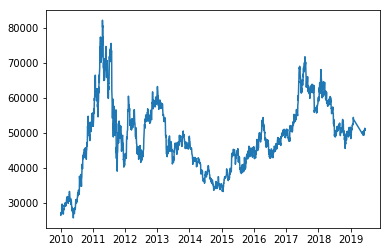

In [37]:
plt.plot(gs['Adj Close'])
plt.show()

## 위는 GS 수정 종가 그래프이다

# 이평선 구하기

이동평균선이란 " 일정 기간 동안의 주가를 산술 평균한 값인 주가 이동평균을 차례로 연결해 만든 선" 이라 한다.

이러한 이평선은 시장의 전반적인 주가 흐름을 판단하고 향후 주가의 추이를 전망하는 데 자주 사용되는 주식시장의 대표적인 기술지표이다. 특히 (5일, 20일, 60일 120일) 이동평균선이 교차하게 되는 시점이 있는데 이를 크로스(cross) 라고 부르고 이 시점이 매우 중요한 매매시점이 되기도 한다

In [38]:
import pandas as pd
import pandas_datareader.data as web
gs = web.DataReader("078930.KS","yahoo","2017-01-01","2019-06-14")

In [39]:
gs.tail()
# 데이터가 잘 받아졌느지 확인하기 위해 tail 메서드를 호출해서 끝부분에 위치하는 5개의 데이터를 확인

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-10,51300.0,50200.0,50600.0,51300.0,119543.0,51300.0
2019-06-11,51300.0,50600.0,51100.0,50900.0,155890.0,50900.0
2019-06-12,51200.0,50500.0,50900.0,50700.0,116411.0,50700.0
2019-06-13,51000.0,49800.0,50800.0,50900.0,241224.0,50900.0
2019-06-14,51000.0,50400.0,50900.0,51000.0,124925.0,51000.0


In [40]:
ma5 = gs['Adj Close'].rolling(window=5).mean()
#수정 종가에 대해 5일 주가 이동평균을 계산 하려면 다음과 같이 코드를 작성한다.

In [41]:
ma5.tail(10)

Date
2019-05-31    49840.0
2019-06-03    49980.0
2019-06-04    50010.0
2019-06-05    50290.0
2019-06-07    50310.0
2019-06-10    50550.0
2019-06-11    50740.0
2019-06-12    50860.0
2019-06-13    50880.0
2019-06-14    50960.0
Name: Adj Close, dtype: float64

## 공유일 걸러내기
공휴일처럼 주식 시장이 열리지 않았던 일자의 데이터를 DataFrame 객체에서 제거하기 위해 먼저 gs.tail() 을 사용하여 해당 일의 데이터의 특징을 살펴본다

In [42]:
gs['Volume'] != 0

Date
2017-01-02    True
2017-01-03    True
2017-01-04    True
2017-01-05    True
2017-01-06    True
2017-01-09    True
2017-01-10    True
2017-01-11    True
2017-01-12    True
2017-01-13    True
2017-01-16    True
2017-01-17    True
2017-01-18    True
2017-01-19    True
2017-01-20    True
2017-01-23    True
2017-01-24    True
2017-01-25    True
2017-01-26    True
2017-01-31    True
2017-02-01    True
2017-02-02    True
2017-02-03    True
2017-02-06    True
2017-02-07    True
2017-02-08    True
2017-02-09    True
2017-02-10    True
2017-02-13    True
2017-02-14    True
              ... 
2019-01-22    True
2019-01-23    True
2019-01-24    True
2019-01-25    True
2019-01-28    True
2019-01-29    True
2019-01-30    True
2019-01-31    True
2019-02-01    True
2019-05-15    True
2019-05-17    True
2019-05-20    True
2019-05-21    True
2019-05-22    True
2019-05-23    True
2019-05-24    True
2019-05-27    True
2019-05-28    True
2019-05-29    True
2019-05-30    True
2019-05-31    True
2019-06

In [59]:
new_gs = gs[gs['Volume'] != 0]
new_gs.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-10,51300.0,50200.0,50600.0,51300.0,119543.0,51300.0
2019-06-11,51300.0,50600.0,51100.0,50900.0,155890.0,50900.0
2019-06-12,51200.0,50500.0,50900.0,50700.0,116411.0,50700.0
2019-06-13,51000.0,49800.0,50800.0,50900.0,241224.0,50900.0
2019-06-14,51000.0,50400.0,50900.0,51000.0,124925.0,51000.0


In [60]:
ma5 = new_gs['Adj Close'].rolling(window=5).mean()

rolling_mean 함수의 두 번째 인자로 20,0,120 의 값을 전달하면 20,60,120 일 이동 평균값 역시 쉽게 계산할 수 있다

In [167]: ma20 = new_gs['Adj Close'].rolling(window=20).mean()

In [168]: ma60 = new_gs['Adj Close'].rolling(window=60).mean()

In [169]: ma120 = new_gs['Adj Close'].rolling(window=120).mean()

In [170]: new_gs.insert(len(new_gs.columns), "MA20", ma20)

In [171]: new_gs.insert(len(new_gs.columns), "MA60", ma60)

In [172]: new_gs.insert(len(new_gs.columns), "MA120", ma120)

In [61]:
ma20 = new_gs['Adj Close'].rolling(window=20).mean()

ma60 = new_gs['Adj Close'].rolling(window=60).mean()

ma120 = new_gs['Adj Close'].rolling(window=120).mean()

new_gs.insert(len(new_gs.columns), "MA5", ma5)

new_gs.insert(len(new_gs.columns), "MA20", ma20)

new_gs.insert(len(new_gs.columns), "MA60", ma60)

new_gs.insert(len(new_gs.columns), "MA120", ma120)

new_gs

,High,Low,Open,Close,Volume,Adj Close,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2017-01-02,54300.0,53300.0,53900.0,54300.0,98660.0,50772.914062,NaN,NaN,NaN,NaN
2017-01-03,54700.0,53100.0,54100.0,54600.0,258793.0,51053.425781,NaN,NaN,NaN,NaN
2017-01-04,54200.0,53200.0,54100.0,53600.0,330695.0,50118.382812,NaN,NaN,NaN,NaN
2017-01-05,53600.0,52700.0,53500.0,53200.0,186267.0,49744.367188,NaN,NaN,NaN,NaN
2017-01-06,54000.0,52900.0,53200.0,53800.0,113829.0,50305.390625,50398.896094,NaN,NaN,NaN
2017-01-09,53700.0,53100.0,53500.0,53200.0,110271.0,49744.367188,50193.186719,NaN,NaN,NaN
2017-01-10,52900.0,52100.0,52700.0,52600.0,179484.0,49183.335938,49819.168750,NaN,NaN,NaN
2017-01-11,53500.0,51900.0,51900.0,53100.0,136957.0,49650.859375,49725.664062,NaN,NaN,NaN
2017-01-12,53800.0,53200.0,53400.0,53600.0,185056.0,50118.382812,49800.467187,NaN,NaN,NaN


In [46]:
import matplotlib.pyplot as plt

# 주가이동평균선 그리기

먼저 수정 종가 그래프를 그리기 위해 label 인자에 Adj Close 를 전달합니다

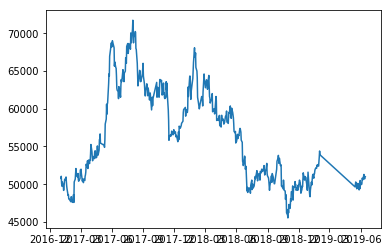

In [62]:
plt.plot(new_gs.index, new_gs['Adj Close'], label="Adj Close")

위와 마찬가지로 5,20,60,120 일 이평선 그래프도 그려본다

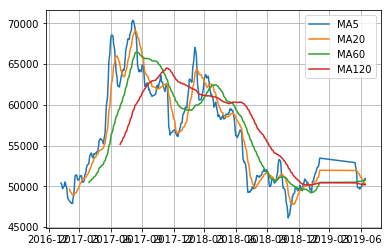

In [64]:
plt.plot(new_gs.index, new_gs['MA5'],label="MA5")
plt.plot(new_gs.index, new_gs['MA20'],label="MA20")
plt.plot(new_gs.index, new_gs['MA60'],label="MA60")
plt.plot(new_gs.index, new_gs['MA120'],label="MA120")

plt.legend(loc='best') #범례를 표시하기 위해 legend 함수를 호출한다
plt.grid()
plt.show()

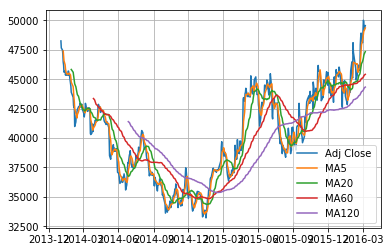

In [65]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Get GS Data from Yahoo
gs = web.DataReader("078930.KS", "yahoo", "2014-01-01", "2016-03-06")
new_gs = gs[gs['Volume']!=0]

# Moving average
ma5 = new_gs['Adj Close'].rolling(window=5).mean()
ma20 = new_gs['Adj Close'].rolling(window=20).mean()
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()

# Insert columns
new_gs.insert(len(new_gs.columns), "MA5", ma5)
new_gs.insert(len(new_gs.columns), "MA20", ma20)
new_gs.insert(len(new_gs.columns), "MA60", ma60)
new_gs.insert(len(new_gs.columns), "MA120", ma120)

# Plot
plt.plot(new_gs.index, new_gs['Adj Close'], label='Adj Close')
plt.plot(new_gs.index, new_gs['MA5'], label='MA5')
plt.plot(new_gs.index, new_gs['MA20'], label='MA20')
plt.plot(new_gs.index, new_gs['MA60'], label='MA60')
plt.plot(new_gs.index, new_gs['MA120'], label='MA120')

plt.legend(loc="best")
plt.grid()
plt.show()